In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/efarr/Documents/GitHub/metalinks/Tests/Figures')
from aux import *
import matplotlib.gridspec as gridspec

In [2]:
DB = pd.read_csv('/home/efarr/Documents/BC/TestDBs/DB_F.csv')
DB['connection'] = DB['HMDB'] + '_' + DB['Symbol']
len(DB['connection'].unique())

10165

In [3]:
metalinks_data = load_prepro_metalinks(MR_path='/home/efarr/Documents/BC/TestDBs/DB_F.csv')
PD = metalinks_data[0]
MR = metalinks_data[1]
anno = metalinks_data[2]
data = load_prepro_other_dbs(MR, PD)
PD_metabolites = data[0]
MR_metabolites = data[1]
MR_proteins = data[2]
MR_interactions = data[3]

['Extracellular' 'Lysosome' 'Mitochondria' 'Cytoplasm'
 'Endoplasmic reticulum' 'Membrane' 'Nucleus' 'Peroxisome'
 'Golgi apparatus']
['Adrenal Cortex' 'Brain' 'Epidermis' 'Fibroblasts' 'Kidney' 'Neuron'
 'Placenta' 'Skeletal Muscle' 'Spleen' 'Testis' 'Adipose Tissue'
 'Intestine' 'Liver' 'Lung' 'Pancreas' 'Platelet' 'Prostate'
 'Thyroid Gland' 'Adrenal Gland' 'Adrenal Medulla' 'Bladder' 'Heart'
 'Leukocyte' 'Ovary' 'Eye Lens' 'All Tissues' 'Erythrocyte'
 'Smooth Muscle' 'Semen' 'Hair' 'Gall Bladder' 'Retina' 'Basal Ganglia'
 'Blood']
['Blood' 'Cerebrospinal Fluid (CSF)' 'Feces' 'Saliva' 'Urine'
 'Amniotic Fluid' 'Sweat' 'Breast Milk' 'Cellular Cytoplasm' 'Bile'
 'Semen' 'Breath']


/tmp/ipykernel_47423/3912491601.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = test.str.contains(location).sum()
/tmp/ipykernel_47423/3912491601.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/efarr/miniconda3/envs/liana/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


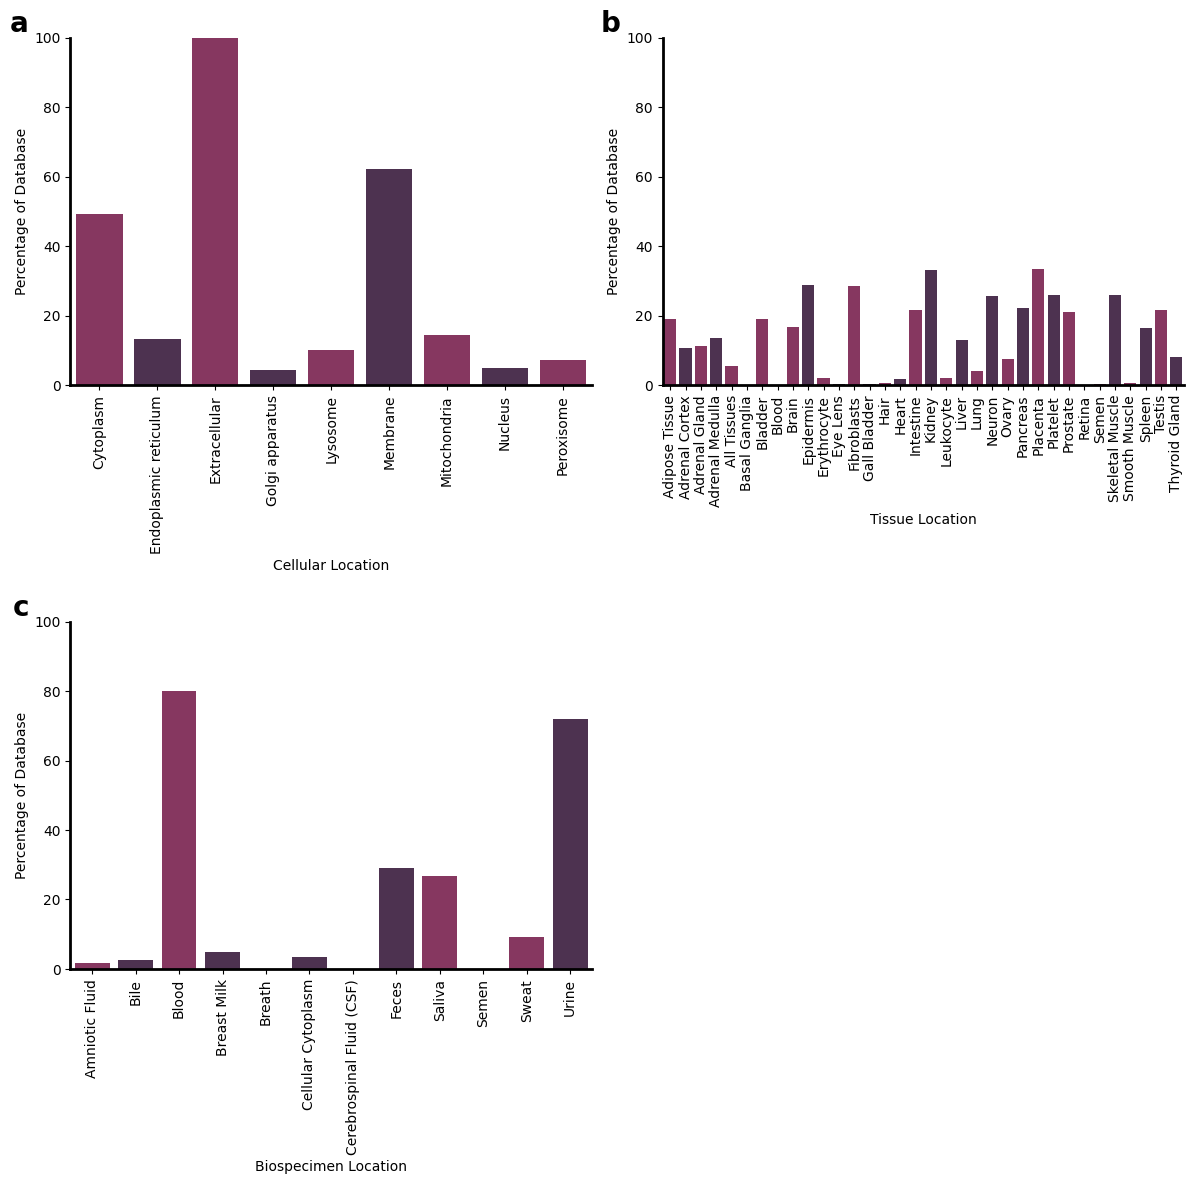

In [4]:
def plot_context(column, xtitle, rotation, ax=None):
    test = MR[column]
    test.dropna(inplace=True)
    test = test.apply(lambda x: x.split(','))
    test = test.explode()
    test = test.str.strip()
    test = test.str.replace('"', '')
    test = test.str.replace("'", '')
    test = test.str.replace('[', '', regex = False)
    test = test.str.replace(']', '', regex = False)
    unique = test.unique()
    #print(unique)

    colors = ["#932a61", "#512D55"] * 20

    percentages = []
    for location in unique:
        test = MR[column]
        count = test.str.contains(location).sum()
        percentages.append(count / len(test) * 100)

    df = pd.DataFrame({'location': unique, 'percentages': percentages})
    df = df.sort_values(by='percentages', ascending=False)
    df['location'] = df['location'].astype('category')

    sns.barplot(data=df, x='location', y='percentages', hue='location', dodge=False, palette=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_ylim(0, 100)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

columns = ['CellLoc', 'TissueLoc', 'BSLoc']
titles = ['Cellular Location', 'Tissue Location', 'Biospecimen Location']
rotation = 90

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for i, (column, title) in enumerate(zip(columns, titles)):
    plot_context(column, title, rotation, ax=axes[i])
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Percentage of Database')
    axes[i].legend('')
    axes[i].get_legend().get_frame().set_linewidth(0.0)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=rotation)

axes[0].text(-0.08, 1.08, 'a', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].text(-0.08, 1.08, 'b', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[2].text(-0.08, 1.08, 'c', transform=axes[2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[3].axis('off')

plt.tight_layout()
plt.show()